In [2]:
!pip install qiskit
!pip install qiskit[visualization]

In [3]:
import qiskit

In [4]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.1', 'qiskit': '0.44.1', 'qiskit-aer': None, 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [5]:
from qiskit import IBMQ

In [ ]:
!pip install qiskit-ibmq-provider

In [7]:
IBMQ.save_account('e8286cff0e21dc8265d17f01d30e9dc62debe3bb6557f339f326fda4b97d2894de135f54fe2dee4e4e2319f5e7e8155b88c856b01502b8a0b9435607e4e6432e')

<ipython-input-7-c76922f7ec6d>:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('e8286cff0e21dc8265d17f01d30e9dc62debe3bb6557f339f326fda4b97d2894de135f54fe2dee4e4e2319f5e7e8155b88c856b01502b8a0b9435607e4e6432e')
<ipython-input-7-c76922f7ec6d>:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('e8286cff0e21dc8265d17f01d30e9dc62debe3bb65

In [8]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
from qiskit import *
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
!pip install qiskit-aer
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

In [11]:
from qiskit.providers.fake_provider import FakePerth
device_backend = FakePerth()

In [12]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
circuit=QuantumCircuit(qr,cr)
!matplotlib inline

/bin/bash: line 1: matplotlib: command not found


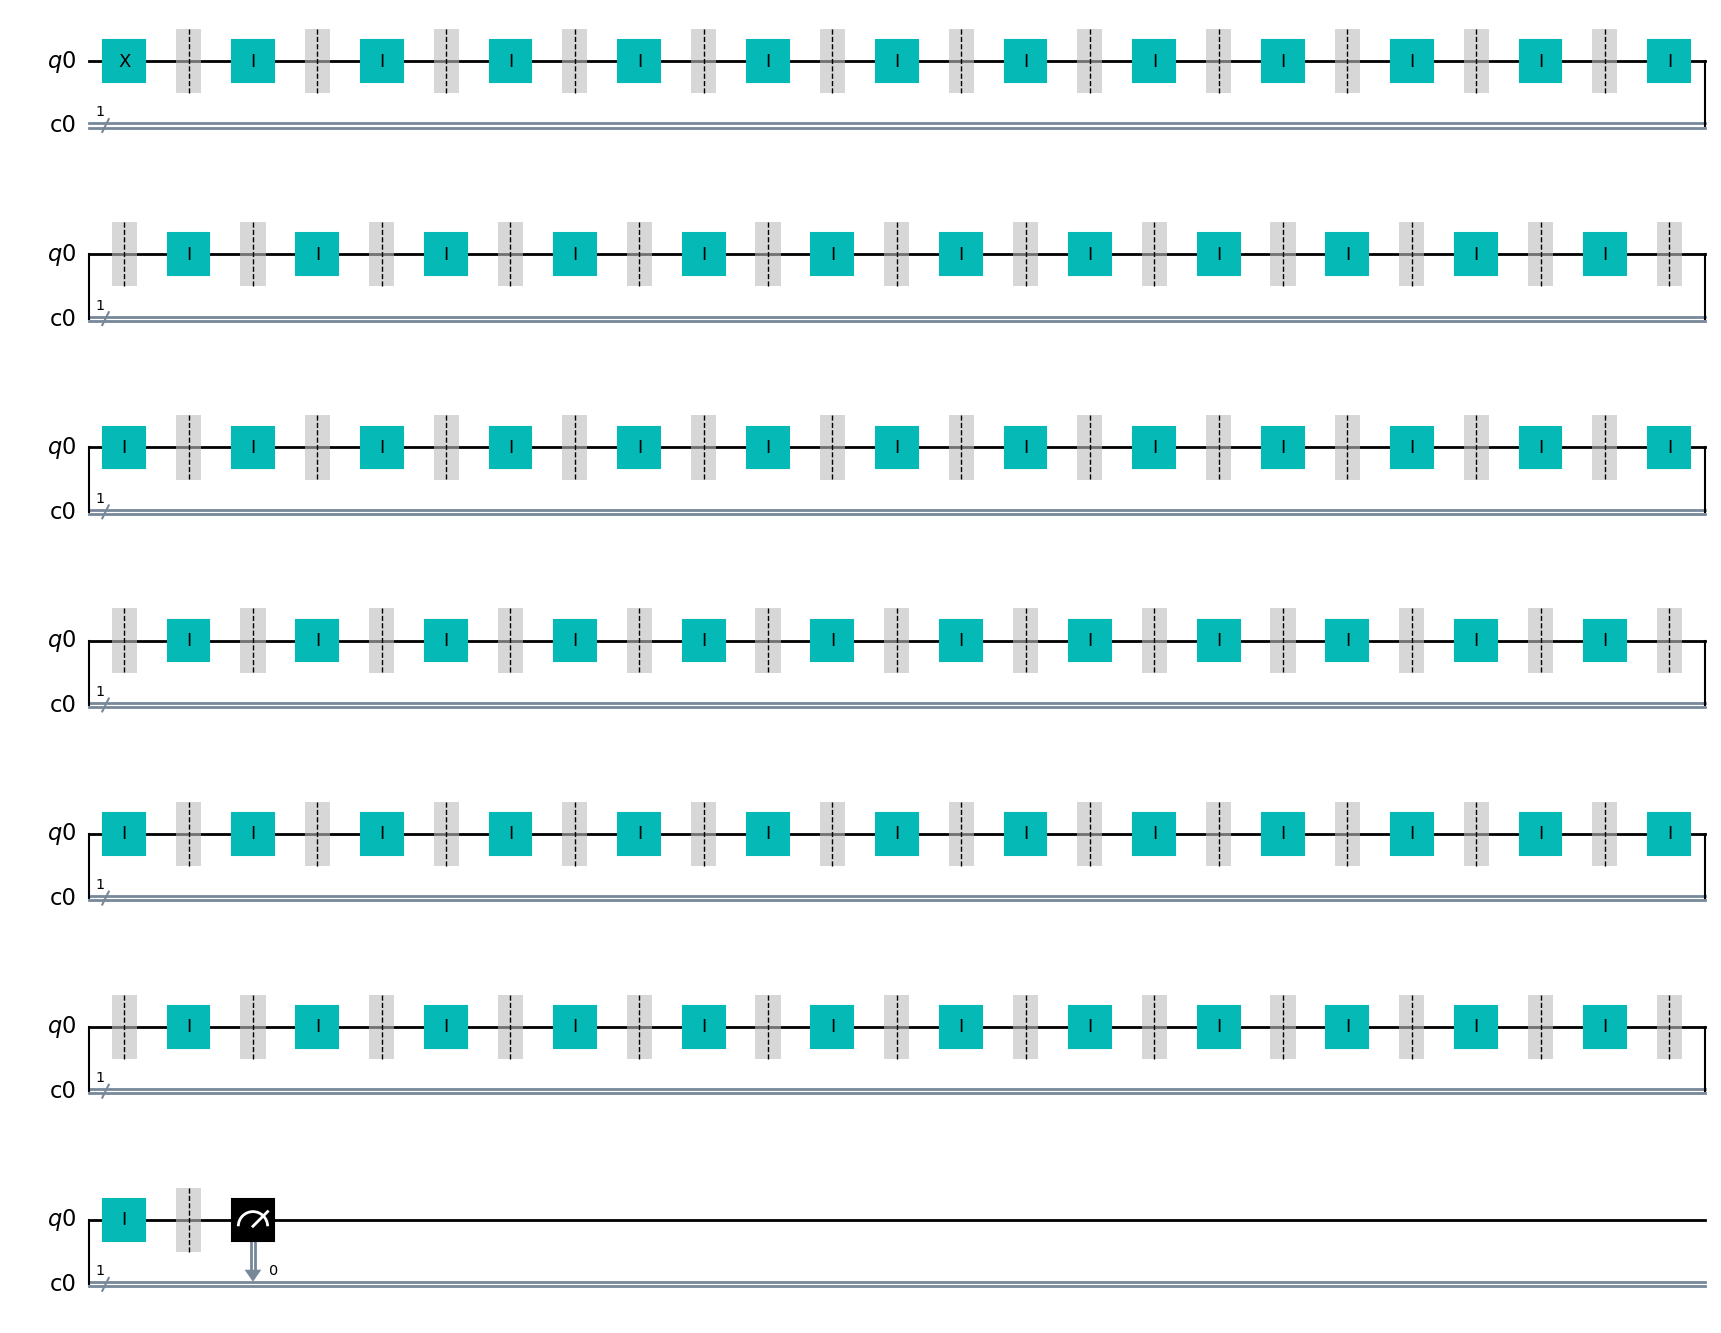

In [13]:
circuit.x(qr[0])
#circuit.barrier(qr[0])

for i in range(75):
  circuit.barrier(qr[0])
  circuit.i(0)
  #circuit.barrier(qr[0])

circuit.barrier(qr[0])
circuit.measure(qr,cr)
circuit.draw(output='mpl')

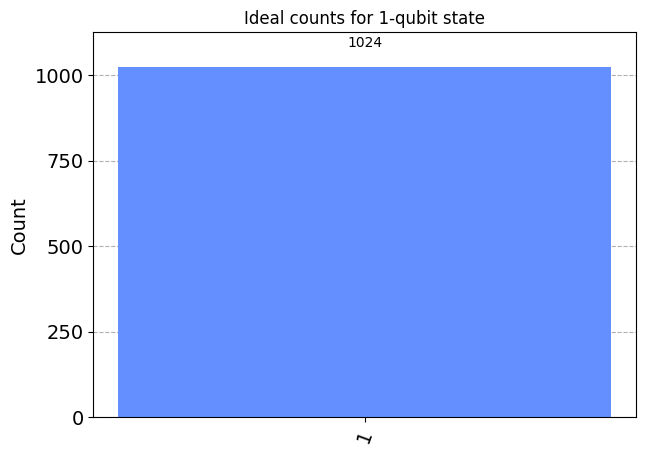

In [14]:
sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circuit, sim_ideal)).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title='Ideal counts for 1-qubit state')

In [15]:
sim_perth = AerSimulator.from_backend(device_backend)

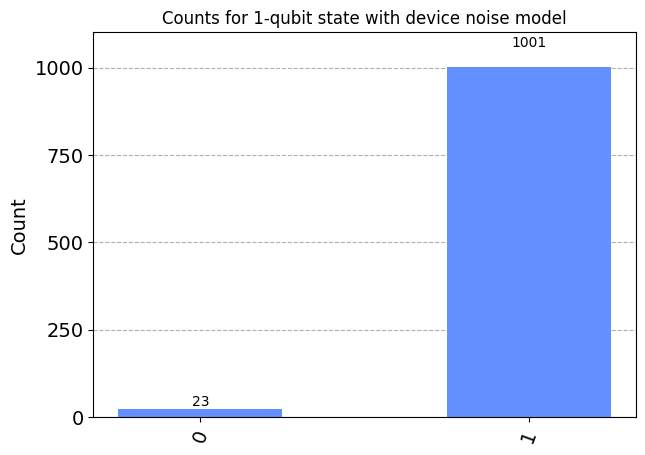

In [17]:
# Transpile the circuit for the noisy basis gates
tcirc = transpile(circuit, sim_perth)

# Execute noisy simulation and get counts
result_noise = sim_perth.run(tcirc).result()
counts_noise = result_noise.get_counts(circuit)
plot_histogram(counts_noise,
               title="Counts for 1-qubit state with device noise model")